In [530]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

### TODO

1. try with regularization

In [481]:
# True function
w, b = 2, 3
f = lambda t: w*t + b

rng = np.random.default_rng(42)

# Data
μ, σ = 1, 1
size = 1000
X = rng.normal(μ, σ, size=size).reshape(-1, 1)

# Noise
noise_σ = 2
noise = rng.normal(0, noise_σ, size=size).reshape(-1, 1)

# True labels
y = f(X) + noise

# Train-test split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [482]:
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Get optimal weight and bias
mzer = np.concatenate((np.squeeze(model.coef_, axis=1), model.intercept_))

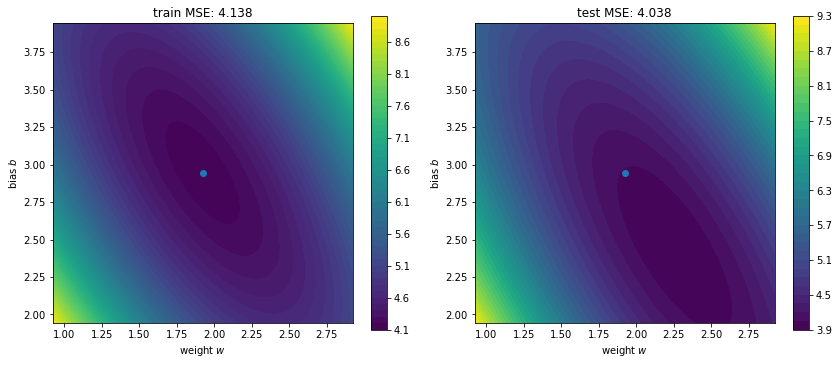

In [529]:
def plot(mzer, X_train, y_train, X_test, y_test):
  def _plot(ax, mzer, X, y, name):
    xn = len(X)

    # Predict on a parameter-space region around the given minimizer
    # shape (xn, wn, bn)
    res = W * X.reshape(-1, 1, 1) + B

    # Take the average of the squared differences (this is MSE)
    diff = res - y.reshape(-1, 1, 1)
    scores = np.linalg.norm(diff, axis=0)**2 / xn

    contour = ax.contourf(W, B, scores, levels=50)
    ax.scatter(*mzer)

    fig.colorbar(contour, ax=ax)

    ax.set_xlim(mzer[0] - 1, mzer[0] + 1)
    ax.set_ylim(mzer[1] - 1, mzer[1] + 1)

    ax.set_xlabel('weight $w$')
    ax.set_ylabel('bias $b$')
    ax.set_title(f"{name} MSE: {mse(y, model.predict(X)):.3f}")

    ax.set_aspect("equal")

  # Create parameter-space around minimizer
  wn, bn = 100, 100
  ws = np.linspace(mzer[0] - 1, mzer[0] + 1, wn)
  bs = np.linspace(mzer[1] - 1, mzer[1] + 1, bn)
  W, B = np.meshgrid(ws, bs)
  
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  _plot(axs[0], mzer, X_train, y_train, "train")
  _plot(axs[1], mzer, X_test, y_test, "test")

  fig.tight_layout()
  fig.show()

plot(mzer, X_train, y_train, X_test, y_test)

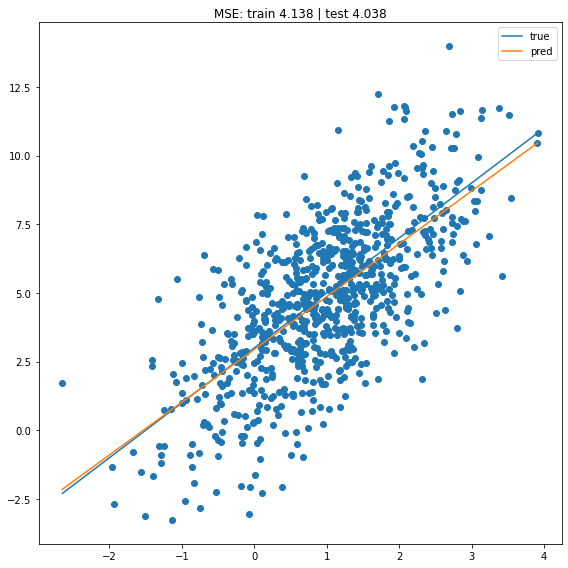

In [484]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

xn = 100
xls = np.linspace(*map(lambda fn: fn(X_train), (np.min, np.max)), xn)
ax.scatter(X_train, y_train)

ax.plot(xls, f(xls), label="true")
ax.plot(xls, model.predict(xls.reshape(-1, 1)), label="pred")

train_mse = mse(y_train, model.predict(X_train))
test_mse = mse(y_test, model.predict(X_test))

ax.legend()
ax.set_title(f"MSE: train {train_mse:.3f} | test {test_mse:.3f}")
fig.tight_layout()
fig.show()